In [46]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
data = pd.read_csv('test.csv')

In [4]:
data

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [6]:
smoking_and_maternal_age = data[['Maternal Smoker', 'Maternal Age']]
smoking_and_maternal_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f7e878760>,
      dtype=object)

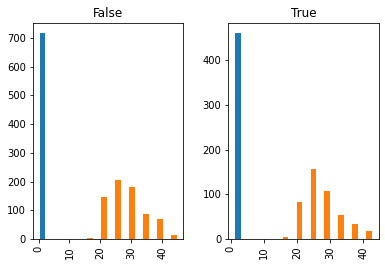

In [7]:
smoking_and_maternal_age.hist(by ='Maternal Smoker')

Both plots are slightly positively skewed.Also the graph observed in the True case is high peaked when compared with False case.It means that most of the Women smoking falls under the age of 25,also the count is greater than 150.More than 1/3rd of smoking women falls under the age of 25.

In [9]:
matsmok = smoking_and_maternal_age['Maternal Age'] [smoking_and_maternal_age['Maternal Smoker'] == True]
matsmok

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [11]:
matsmok.shape[0]

459

#459 Women in the entire dataset smokes

In [12]:
notsmok = smoking_and_maternal_age['Maternal Age'] [smoking_and_maternal_age['Maternal Smoker'] == False]
notsmok

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

In [13]:
notsmok.shape[0]

715

#715 Women in the entire dataset do not smoke

#Question 2

I would use A/B testing for this test 

#Test statistic
The alternative hypothesis compares the average age of the two groups and says that the average age of  mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will subtract this "average age of the smoking group $- $ average age of the non-smoking group". If we get a negative value it means that the average of non smokers is higher than average age of smokers.

#Question 3
#Hypothesis
Null Hypothesis: There is no underlying difference between the age of smokers and non smokers

Alternative hypothesis: The average age of smoking group is smaller than non smoking group. 


#Question 4
#Test statistic
The alternative hypothesis compares the average age of the two groups and says that the average age of  mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will subtract this "average age of the smoking group $- $ average age of the non-smoking group". If we get a larger negative value it means that there is a considerable deviation in between the  average of non smokers and average age of smokers.

In [15]:
means_table = smoking_and_maternal_age.groupby('Maternal Smoker').mean()


In [16]:
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [19]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference 

-0.8076725017901509

Since we got -0.8 as the difference which is very close to zero .We can say that there is no considerable difference in between two groups age.

In [25]:
shuffle = smoking_and_maternal_age.sample(1174,replace = False)
shuffle

,Maternal Smoker,Maternal Age
942,False,27
833,False,27
994,False,18
98,False,33
889,False,43
...,...,...
194,False,25
320,False,22
991,False,32
354,True,18


In [30]:
shuffled_age= shuffle['Maternal Age']


In [34]:
original_and_shuffled= smoking_and_maternal_age.assign(shuffled_age=shuffled_age.values )
original_and_shuffled

,Maternal Smoker,Maternal Age,shuffled_age
0,False,27,27
1,False,33,27
2,True,28,18
3,True,23,33
4,False,25,43
...,...,...,...
1169,False,27,25
1170,False,24,22
1171,True,30,32
1172,False,21,18


In [35]:
new_means= original_and_shuffled.groupby('Maternal Smoker').mean()
new_means

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.055944
True,26.736383,27.496732


In [36]:
difference = new_means['shuffled_age'][1]- new_means['shuffled_age'][0]
difference

0.44078797019973237

In [37]:
smoking_and_birthweight = data[['Maternal Smoker', 'Maternal Age']]
shuffled = smoking_and_maternal_age.sample(1174,replace = False)
shuffled_weights = shuffled['Maternal Age']
original_and_shuffled = smoking_and_maternal_age.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

-0.065176653411946

In [42]:
import numpy as np
import array
differences = np.zeros(100)
for i in np.arange(100):
  smoking_and_birthweight = data[['Maternal Smoker', 'Maternal Age']]
  shuffled = smoking_and_maternal_age.sample(1174,replace = False)
  shuffled_weights = shuffled['Maternal Age']
  original_and_shuffled = smoking_and_maternal_age.assign(shuffled_weights=shuffled_weights.values )
  all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
  difference = all_group_means['shuffled_weights'][1]- all_group_means['shuffled_weights'][0]
  differences[i] = difference

In [43]:
differences

array([-0.55726496, -0.60019196,  0.05802215, -0.09937688, -0.67889148,
       -0.41417493,  0.43363347,  0.07948566,  0.60891875, -0.06718162,
        0.3298932 , -0.08506787, -0.09579963,  0.12598991, -0.04571812,
        0.15460792, -0.66100523,  0.48013773, -0.10295413,  0.19395768,
       -0.06002712,  0.10452641, -0.07075887,  0.3298932 ,  0.18680318,
       -0.11010863, -0.36051617, -0.13872663, -0.38913418, -0.19953989,
       -0.09579963, -0.00636836, -0.32116642,  0.01151789,  0.6053415 ,
        0.15460792, -0.36051617,  0.45509697, -0.2138489 ,  0.15818517,
       -0.12799488, -0.00636836,  0.45867422, -0.03140911, -0.36767067,
       -0.07791337,  0.52664199, -0.81124975,  0.37997471, -0.26035315,
        0.45151972,  0.00794064, -0.32116642, -0.03856362, -0.36051617,
        0.14029892,  0.3298932 , -0.47856544, -0.33189817, -0.02067736,
        0.6196505 ,  0.26550269,  0.37997471,  0.39428371, -0.33905267,
        0.0401359 , -0.41059768, -0.35336167, -0.23173515, -0.19

In [44]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.557265
1,-0.600192
2,0.058022
3,-0.099377
4,-0.678891
...,...
95,-0.181654
96,-0.342630
97,-0.117263
98,-0.306857


Observed Difference: -0.8076725017901509


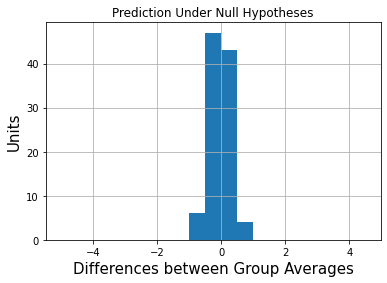

In [47]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

Notice how the distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. 

The observed difference in the original sample is about -0.8076725017901509, which is supports Null. The observed value of the statistic and the predicted behavior of the statistic support $Null Hypothesis$.

In [48]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.01

The empirical P-value is 0.1